In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
import random
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

# fechas
from datetime import datetime

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# algoritmos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# métricas
import sklearn.metrics as metrics

# hiperparametrización
from sklearn.model_selection import GridSearchCV

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

import xgboost as xgb

from numpy import random
random.seed(42)

from sklearn.model_selection import train_test_split

In [2]:
# Ruta al archivo Parquet 
ruta_archivo = "C:/Users/Herre/Desktop/Data/df_encoding.csv"
# Leer el archivo Parquet 
df_cluster = pd.read_csv(ruta_archivo)

In [3]:
df_cluster

,pk_cid,pk_partition,entry_date,segment,em_account_pp,salary,entry_channel_KAT,entry_channel_KFC,entry_channel_KHE,entry_channel_KHK,entry_channel_KHM,entry_channel_KHQ,entry_channel_Otros,active_customer_1.0,short_term_deposit_1,loans_1,mortgage_1,funds_1,securities_1,long_term_deposit_1,credit_card_1,payroll_1.0,pension_plan_1.0,payroll_account_1,emc_account_1,debit_card_1,em_account_p_1,em_acount_1,country_id_ES,region_code_1.0,region_code_2.0,region_code_3.0,region_code_4.0,region_code_5.0,region_code_6.0,region_code_7.0,region_code_8.0,region_code_9.0,region_code_10.0,region_code_11.0,region_code_12.0,region_code_13.0,region_code_14.0,region_code_15.0,region_code_16.0,region_code_17.0,region_code_18.0,region_code_19.0,region_code_20.0,region_code_21.0,region_code_22.0,region_code_23.0,region_code_24.0,region_code_25.0,region_code_26.0,region_code_27.0,region_code_28.0,region_code_29.0,region_code_30.0,region_code_31.0,region_code_32.0,region_code_33.0,region_code_34.0,region_code_35.0,region_code_36.0,region_code_37.0,region_code_38.0,region_code_39.0,region_code_40.0,region_code_41.0,region_code_42.0,region_code_43.0,region_code_44.0,region_code_45.0,region_code_46.0,region_code_47.0,region_code_48.0,region_code_49.0,region_code_50.0,region_code_51.0,gender_V,age_0-17,age_18-25,age_26-35,age_36-45,age_46-65,deceased_S
0,1076016,2018-09-28,2015-10-05,1,0,130009.98,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1075994,2018-09-28,2015-10-05,1,0,97498.50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1085344,2018-09-28,2015-10-22,2,0,362560.02,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1087187,2018-09-28,2015-10-24,1,0,27535.77,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,1064230,2018-09-28,2015-09-20,1,0,2783985.75,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299344,1314665,2019-05-28,2017-09-23,2,0,111435.36,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
299345,1314667,2019-05-28,2017-09-23,2,0,41553.57,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
299346,1314668,2019-05-28,2017-09-23,1,0,135522.15,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
299347,1314669,2019-05-28,2017-09-23,2,0,127411.35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


# Elbow curve

In [4]:
df_cluster.drop(columns=['pk_partition', 'entry_date'], inplace=True)
#borro estas dos columnas porque al hacer la Curva del codo me dice que no puedo hacerla si hay columnas (las fechas) que no son numéricas

In [5]:
!pip install scikit-learn
from sklearn.cluster import KMeans


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


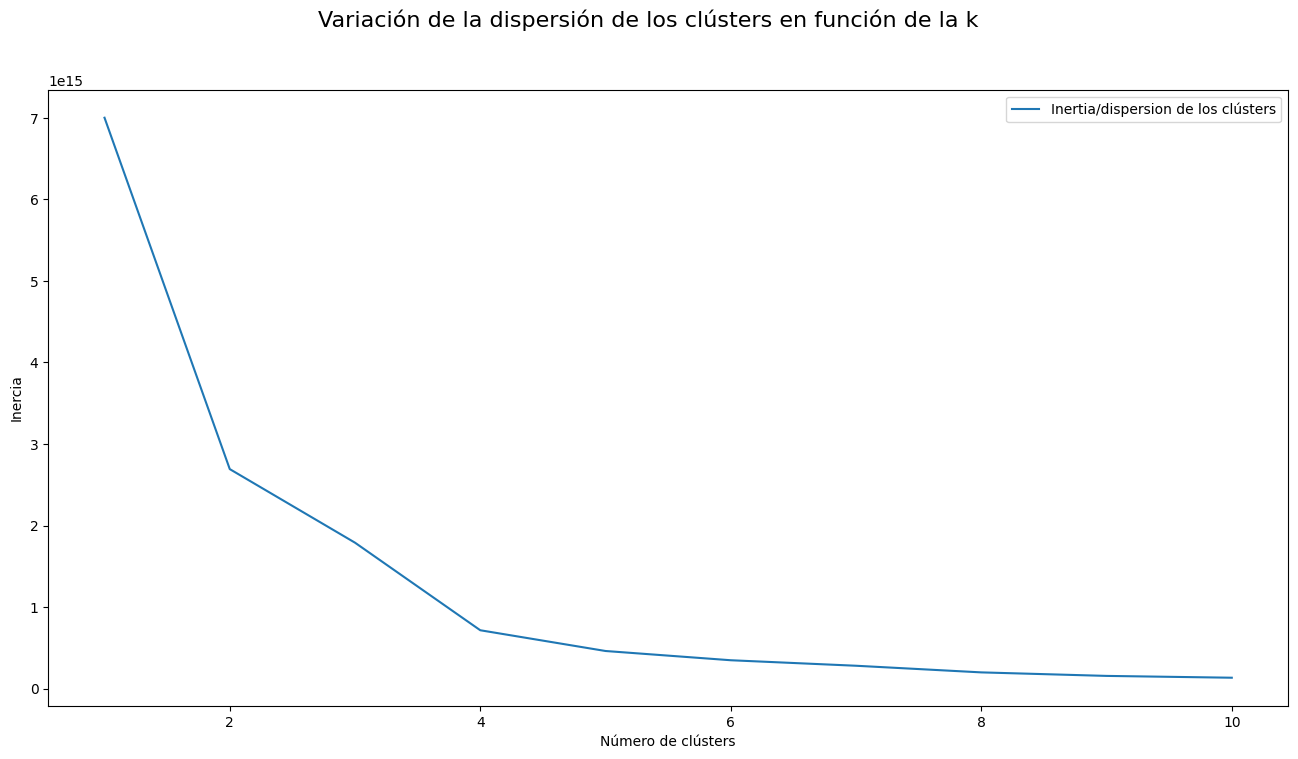

In [11]:
X = df_cluster.drop(columns=['loans_1', 'salary'])

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse[k] = kmeans.inertia_

# Crear Elbow curve
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label="Inertia/dispersion de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize=16)
ax.set_xlabel("Número de clústers")
ax.set_ylabel("Inercia")
ax.legend()
plt.show()

# Para easymoney los clientes con más valor son los que tienen financiación, ahorro o inversión....

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

In [9]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters if needed
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)
# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [10]:
# Dimensionality Reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
# Create a DataFrame for the reduced data
df_reduced = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_reduced['t-SNE1'] = X_tsne[:, 0]
df_reduced['t-SNE2'] = X_tsne[:, 1]
df_reduced['salary'] = df_cluster['salary']
df_reduced['cluster'] = df_cluster['cluster']

KeyboardInterrupt: 

In [ ]:
# Plotting PCA clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='viridis', data=df_reduced, alpha=0.7)
plt.title('Clusters Visualized using PCA')
plt.legend()
plt.show()

In [ ]:
# Plotting t-SNE clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='cluster', palette='viridis', data=df_reduced, alpha=0.7)
plt.title('Clusters Visualized using t-SNE')
plt.legend()
plt.show()

In [ ]:
# Visualizing the salary distribution across clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='salary', data=df_reduced)
plt.title('Salary Distribution Across Clusters')
plt.show()